In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [4]:
# 1.Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.
df = pd.read_csv('world_data_full_apply.csv', index_col = 0)
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [5]:
nulos = df.isnull().sum()
nulos

country                                   0
density                                   0
abbreviation                              7
agricultural_land                         7
land_area                                30
armed_forces_size                        29
birth_rate                                6
calling_code                              1
capital/major_city                        3
co2-emissions                            12
cpi                                      20
cpi_change                               16
currency-code                            15
fertility_rate                            7
forested_area                             7
gasoline_price                           20
gdp                                       2
gross_primary_education_enrollment        7
gross_tertiary_education_enrollment      12
infant_mortality                          6
largest_city                              6
life_expectancy                           8
maternal_mortality_ratio        

In [6]:
# % nulos
nulos = df.isnull().sum()/df.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

population                              80.000000
urban_population                        76.923077
minimum_wage                            23.076923
land_area                               15.384615
armed_forces_size                       14.871795
tax_revenue                             13.333333
gasoline_price                          10.256410
cpi                                     10.256410
unemployment_rate                        9.743590
population_labor_force_participation     9.743590
cpi_change                               8.205128
currency-code                            7.692308
maternal_mortality_ratio                 7.179487
total_tax_rate                           6.153846
gross_tertiary_education_enrollment      6.153846
co2-emissions                            6.153846
life_expectancy                          4.102564
forested_area                            3.589744
gross_primary_education_enrollment       3.589744
abbreviation                             3.589744


In [7]:
df.dtypes

country                                  object
density                                 float64
abbreviation                             object
agricultural_land                       float64
land_area                               float64
armed_forces_size                       float64
birth_rate                              float64
calling_code                            float64
capital/major_city                       object
co2-emissions                           float64
cpi                                     float64
cpi_change                              float64
currency-code                            object
fertility_rate                          float64
forested_area                           float64
gasoline_price                          float64
gdp                                     float64
gross_primary_education_enrollment      float64
gross_tertiary_education_enrollment     float64
infant_mortality                        float64
largest_city                            

In [8]:
# 2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar 
# los valores nulos en cada una de las columnas identificadas en el paso anterior.
# 3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar
#  los valores nulos en las columnas.
columnas_object_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns

In [9]:
df.isnull().any()

country                                 False
density                                 False
abbreviation                             True
agricultural_land                        True
land_area                                True
armed_forces_size                        True
birth_rate                               True
calling_code                             True
capital/major_city                       True
co2-emissions                            True
cpi                                      True
cpi_change                               True
currency-code                            True
fertility_rate                           True
forested_area                            True
gasoline_price                           True
gdp                                      True
gross_primary_education_enrollment       True
gross_tertiary_education_enrollment      True
infant_mortality                         True
largest_city                             True
life_expectancy                   

In [11]:
print(columnas_object_con_nulos)

Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [12]:
# Veamos, por columna, el porcentaje en el que aparece cada valor
for col in columnas_object_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

    #normalize sirve para que me de el porcentaje por columna, pero está en formato decimal, así que multiplicamos por 100

La distribución de las categorías (incluyendo nulos) para la columna abbreviation


abbreviation
NaN    3.589744
AF     0.512821
PY     0.512821
NE     0.512821
NG     0.512821
         ...   
GR     0.512821
GD     0.512821
GT     0.512821
GN     0.512821
ZW     0.512821
Name: proportion, Length: 189, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna capital/major_city


capital/major_city
NaN                      1.538462
Kabul                    0.512821
Wellington               0.512821
Managua                  0.512821
Niamey                   0.512821
                           ...   
St. George's, Grenada    0.512821
Guatemala City           0.512821
Conakry                  0.512821
Bissau                   0.512821
Harare                   0.512821
Name: proportion, Length: 193, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna currency-code


currency-code
EUR    11.794872
NaN     7.692308
XOF     4.102564
XCD     3.076923
USD     3.076923
         ...    
GMD     0.512821
FJD     0.512821
ETB     0.512821
ERN     0.512821
ZMW     0.512821
Name: proportion, Length: 134, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna largest_city


largest_city
NaN                      3.076923
S����                    1.025641
Kigali                   0.512821
Moscow                   0.512821
Auckland                 0.512821
                           ...   
Macedonia                0.512821
St. George's, Grenada    0.512821
Guatemala City           0.512821
Kankan                   0.512821
Harare                   0.512821
Name: proportion, Length: 189, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna official_language


official_language
English             15.897436
French              12.820513
Spanish              9.743590
Arabic               9.230769
Portuguese           3.589744
                      ...    
Hebrew               0.512821
Jamaican English     0.512821
Lao                  0.512821
Latvian              0.512821
Shona                0.512821
Name: proportion, Length: 77, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna continent


continent
Africa             27.179487
Europe             24.102564
Asia               23.076923
Central America    10.256410
Oceania             7.179487
South America       6.666667
North America       1.025641
NaN                 0.512821
Name: proportion, dtype: float64

........................


In [14]:
df['abbreviation'] = df['abbreviation'].fillna('Unknown')
df

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,NaN,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


In [15]:
df['abbreviation'].isnull().sum()

0

In [16]:
lista_unknown = ['capital/major_city', 'currency-code','largest_city','official_language','continent']
df[lista_unknown] = df[lista_unknown].fillna('Unknown')
df

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,NaN,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


In [17]:
columnas_object_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns

In [18]:
df.isnull().any()

country                                 False
density                                 False
abbreviation                            False
agricultural_land                        True
land_area                                True
armed_forces_size                        True
birth_rate                               True
calling_code                             True
capital/major_city                      False
co2-emissions                            True
cpi                                      True
cpi_change                               True
currency-code                           False
fertility_rate                           True
forested_area                            True
gasoline_price                           True
gdp                                      True
gross_primary_education_enrollment       True
gross_tertiary_education_enrollment      True
infant_mortality                         True
largest_city                            False
life_expectancy                   

In [19]:
print(columnas_object_con_nulos)

Index([], dtype='object')


In [20]:
columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns

In [21]:
print(columnas_number_con_nulos)

Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')


In [ ]:
for col in columnas_number_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

In [25]:
# % nulos
nulos = df.isnull().sum()/df.shape[0]*100
# % nulos ordenados de mayor a menor
nulos

country                                  0.000000
density                                  0.000000
abbreviation                             0.000000
agricultural_land                        3.589744
land_area                               15.384615
armed_forces_size                       14.871795
birth_rate                               3.076923
calling_code                             0.512821
capital/major_city                       0.000000
co2-emissions                            6.153846
cpi                                     10.256410
cpi_change                               8.205128
currency-code                            0.000000
fertility_rate                           3.589744
forested_area                            3.589744
gasoline_price                          10.256410
gdp                                      1.025641
gross_primary_education_enrollment       3.589744
gross_tertiary_education_enrollment      6.153846
infant_mortality                         3.076923


'fertility_rate','forested_area','gdp','gross_primary_education_enrollment','gross_tertiary_education_enrollment','infant_mortality','life_expectancy','maternal_mortality_ratio','out_of_pocket_health_expenditure','physicians_per_thousand','tax_revenue','total_tax_rate','unemployment_rate','latitude','longitude'                           

In [29]:
lista_media = ['agricultural_land','gasoline_price','population_labor_force_participation']
lista_mediana = ['land_area','armed_forces_size','birth_rate','co2-emissions','cpi','cpi_change','fertility_rate','forested_area','gdp','gross_primary_education_enrollment','gross_tertiary_education_enrollment','infant_mortality','life_expectancy','maternal_mortality_ratio','out_of_pocket_health_expenditure','physicians_per_thousand','tax_revenue','total_tax_rate','unemployment_rate','latitude','longitude']
#calling_code

In [31]:
df[lista_mediana] = df[lista_mediana].fillna(df[lista_mediana].median())
df

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,148.460,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,28.5,7.20,376.0,Andorra la Vella,469.000,124.74,2.3,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,Andorra la Vella,73.2,53.0,6.63,Catalan,36.4,3.33,77.142,NaN,16.3,37.2,5.36,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,148.460,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,124.74,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,16.3,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,16.3,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


In [34]:
df[lista_media] = df[lista_media].fillna(df[lista_media].mean())

In [35]:
nulos = df.isnull().sum()
nulos

country                                   0
density                                   0
abbreviation                              0
agricultural_land                         0
land_area                                 0
armed_forces_size                         0
birth_rate                                0
calling_code                              1
capital/major_city                        0
co2-emissions                             0
cpi                                       0
cpi_change                                0
currency-code                             0
fertility_rate                            0
forested_area                             0
gasoline_price                            0
gdp                                       0
gross_primary_education_enrollment        0
gross_tertiary_education_enrollment       0
infant_mortality                          0
largest_city                              0
life_expectancy                           0
maternal_mortality_ratio        

In [36]:
df.shape[0]

195

In [37]:
# % nulos
nulos = df.isnull().sum()/df.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

population                              80.000000
urban_population                        76.923077
minimum_wage                            23.076923
calling_code                             0.512821
country                                  0.000000
life_expectancy                          0.000000
maternal_mortality_ratio                 0.000000
official_language                        0.000000
out_of_pocket_health_expenditure         0.000000
physicians_per_thousand                  0.000000
population_labor_force_participation     0.000000
infant_mortality                         0.000000
tax_revenue                              0.000000
total_tax_rate                           0.000000
unemployment_rate                        0.000000
latitude                                 0.000000
longitude                                0.000000
largest_city                             0.000000
gross_tertiary_education_enrollment      0.000000
density                                  0.000000


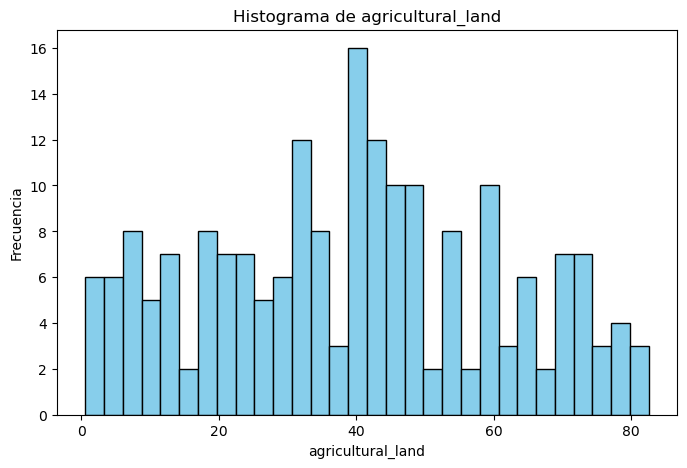

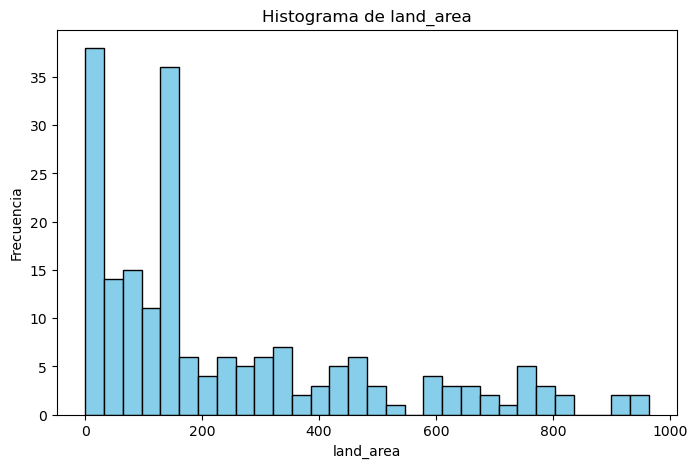

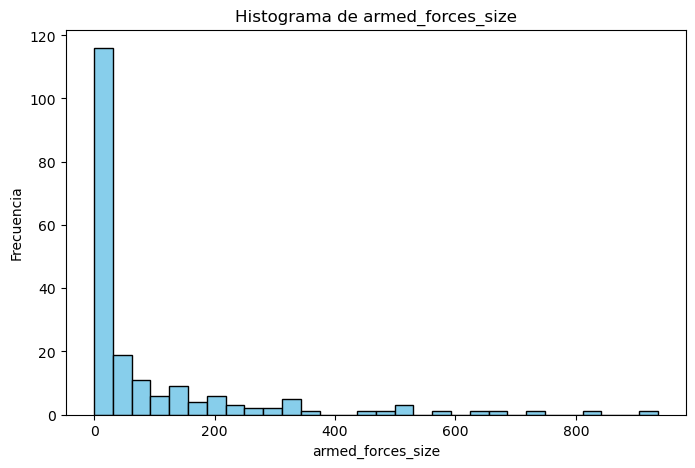

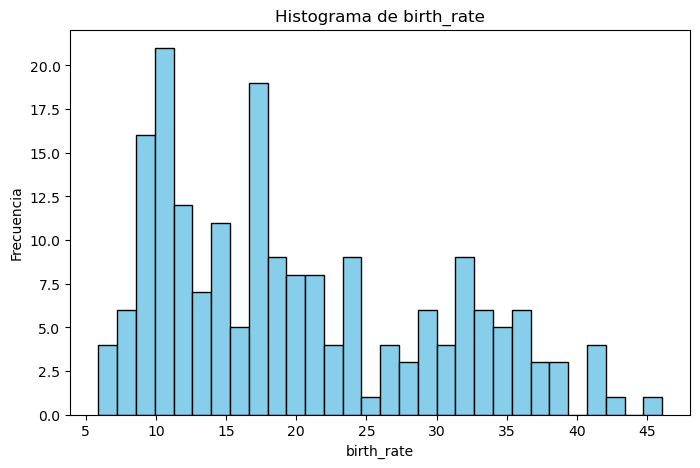

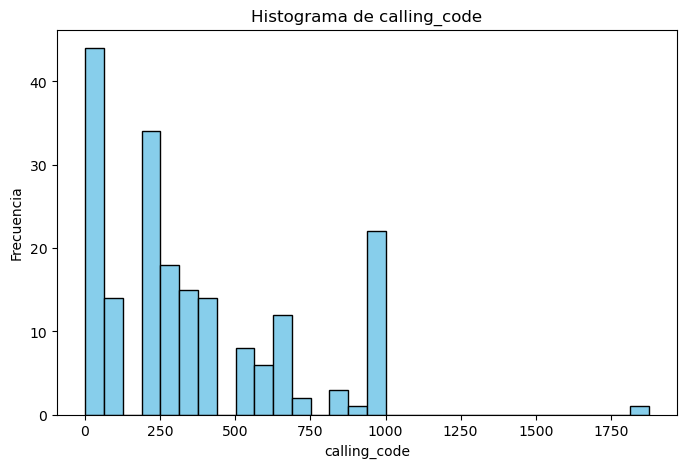

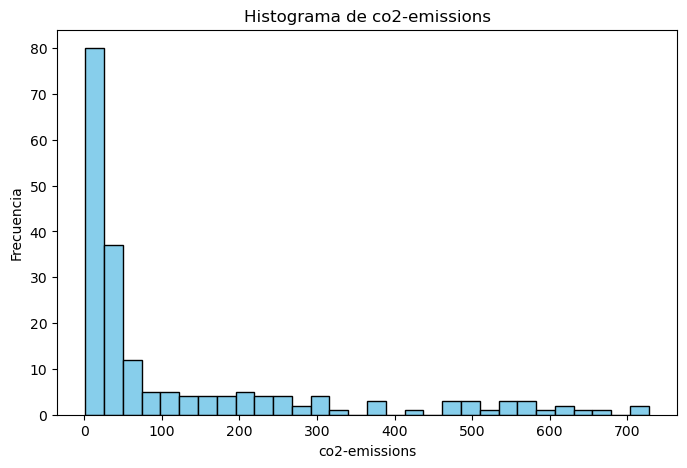

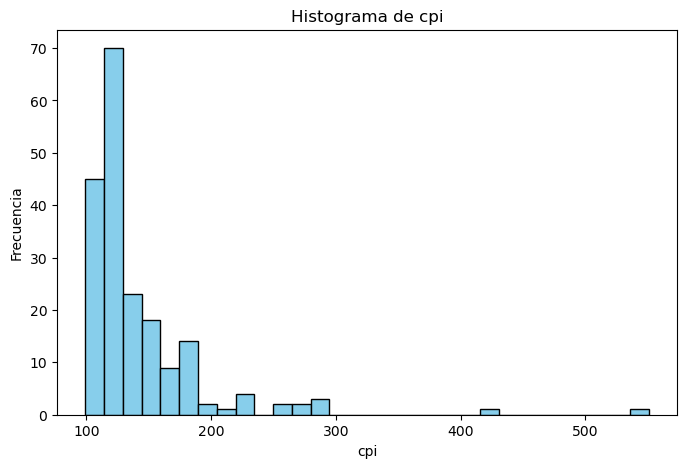

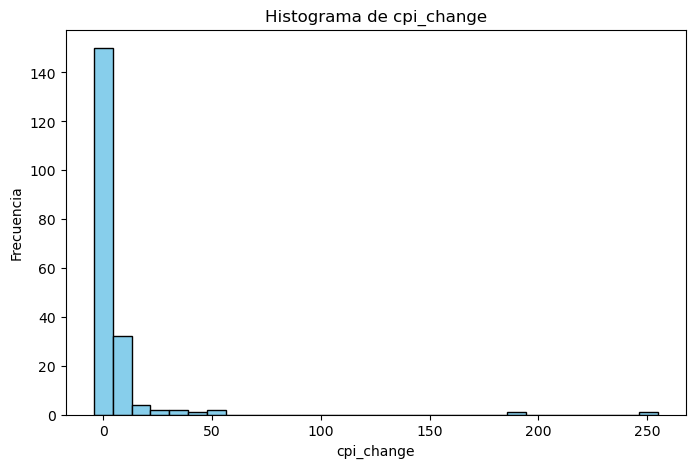

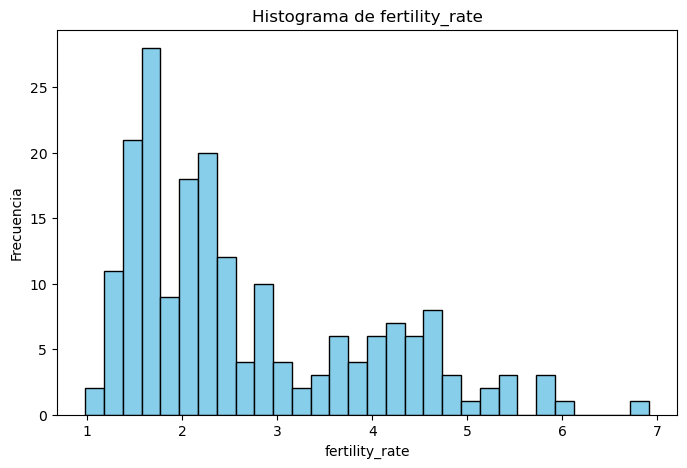

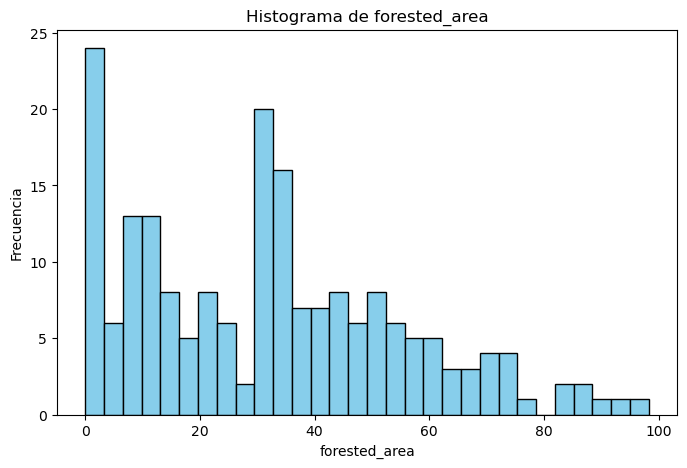

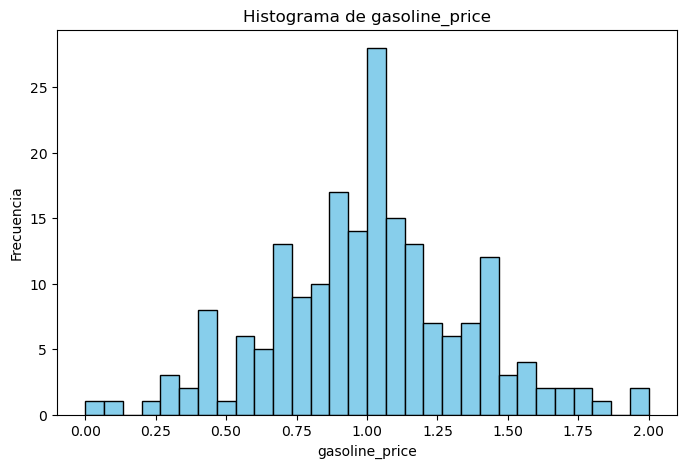

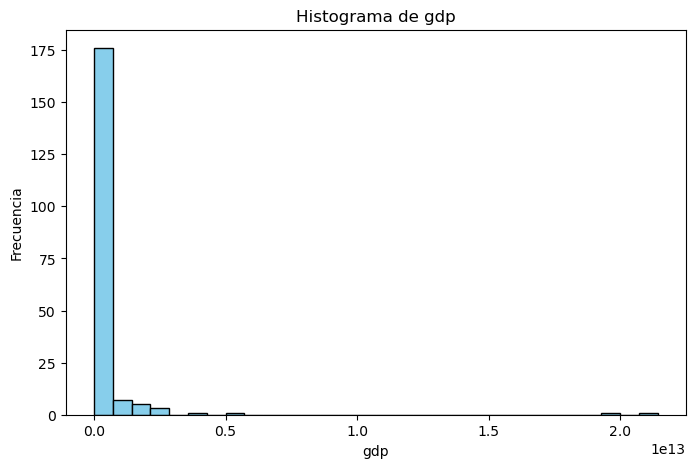

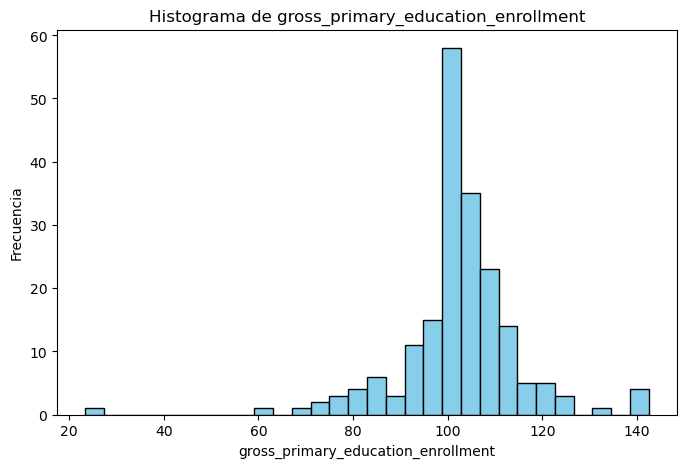

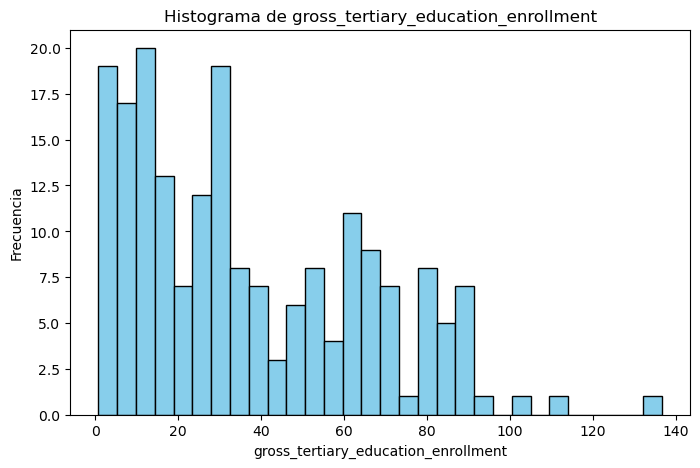

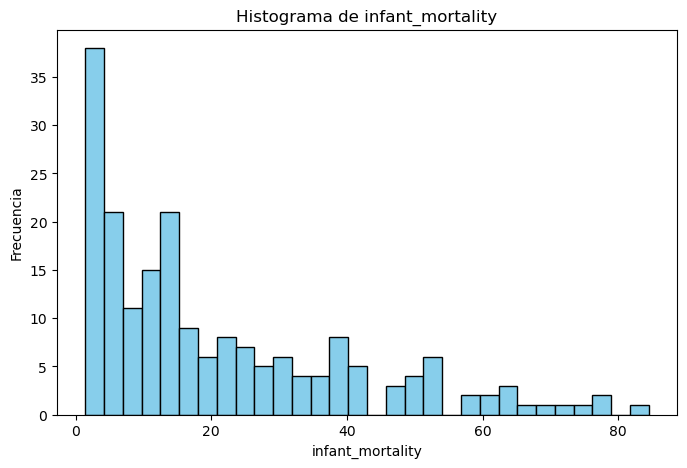

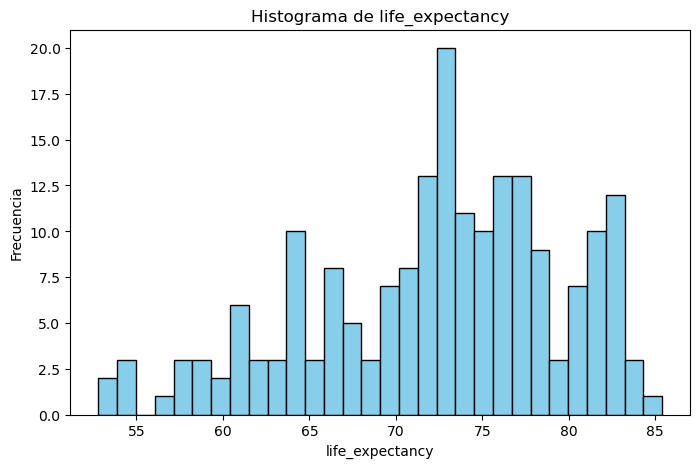

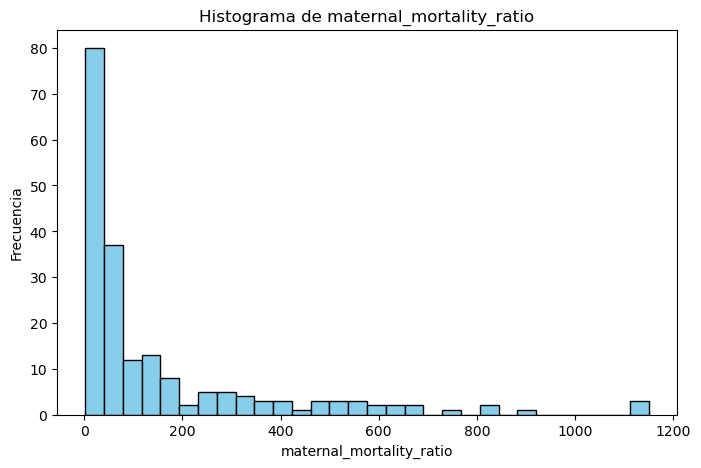

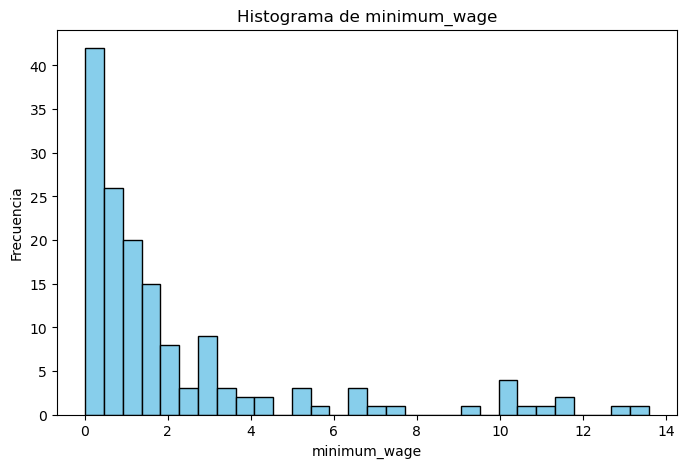

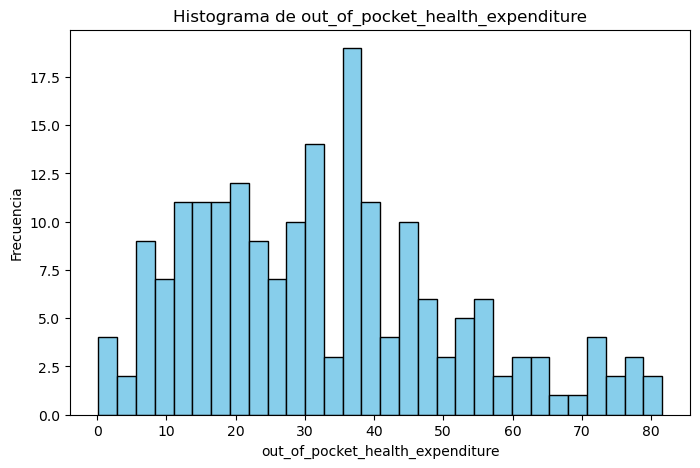

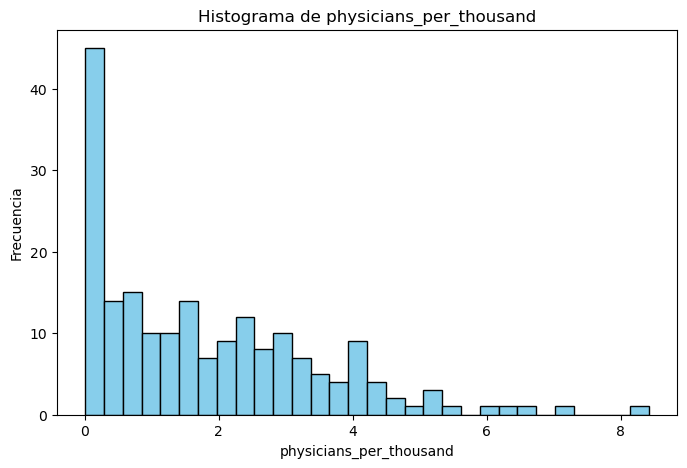

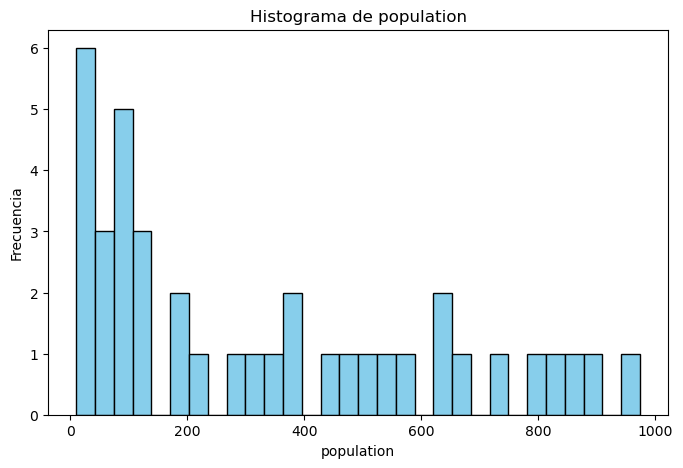

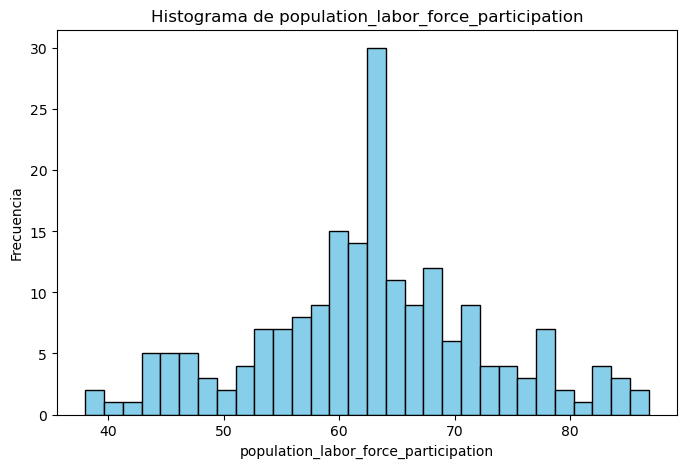

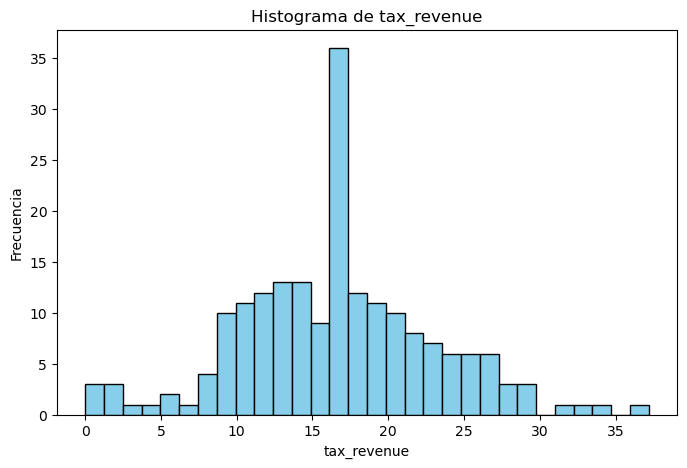

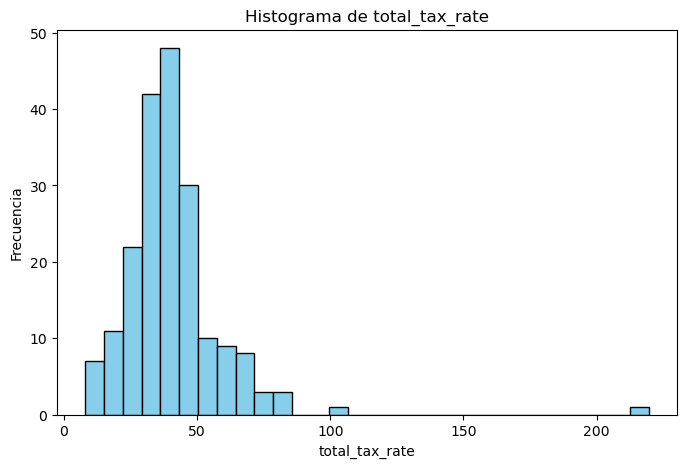

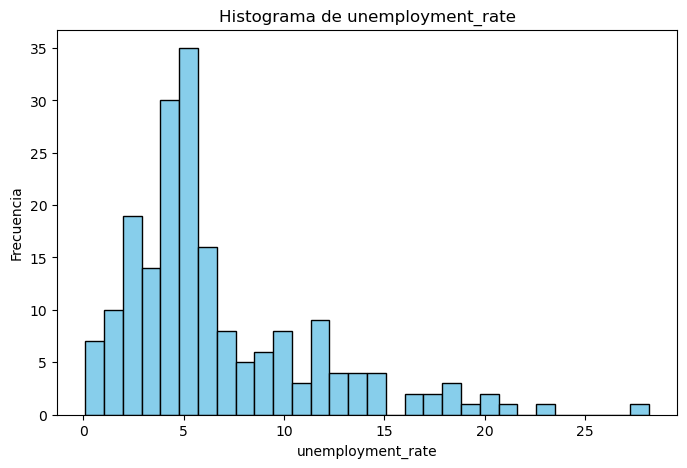

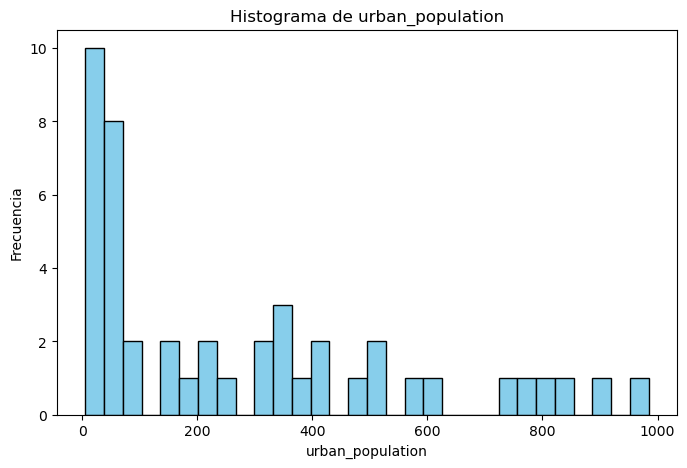

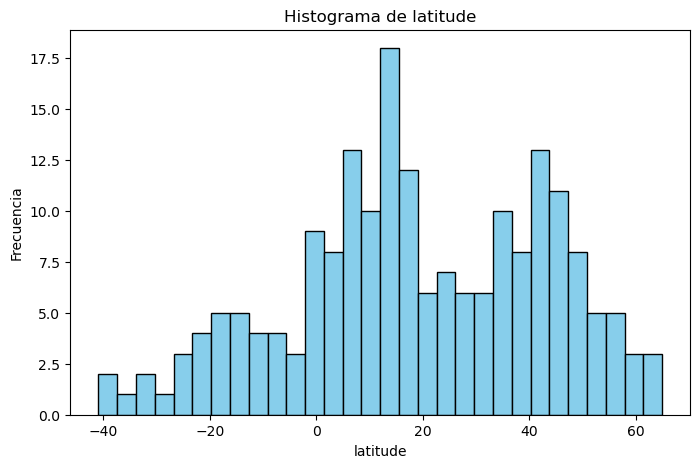

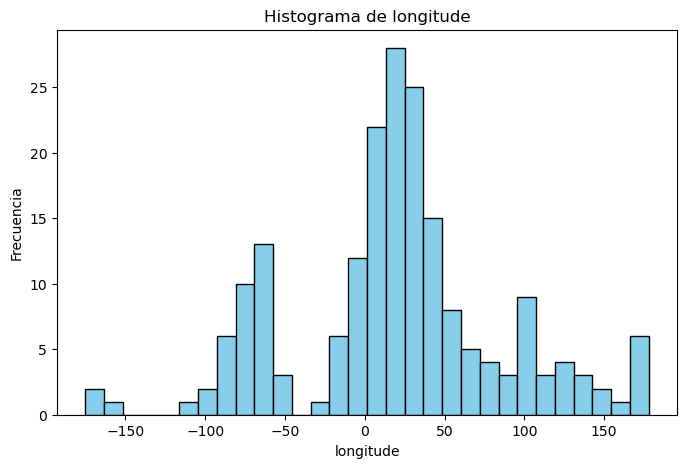

In [33]:
import matplotlib.pyplot as plt

# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
# 4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores 
# nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.
